## Titanic Binary classification

* ### Goal: Predict whether a Titanic passenger will survive based on available data.

* ### Task type: Binary classification.

* ### Model: Logistic regression.

In [24]:
# Load data from a xls file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Construct the file path to the parent directory
file_path = os.path.join('Titanic-Dataset.xls')

# Load the data
data = pd.read_csv(file_path)

# Find passengers with familia name Andersson
data[data['Name'].str.contains('Andersson')]





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S


In [2]:
# make dataset Pclass 1 only
data_pclass1 = data[data['Pclass'] == 1]
data_pclass2 = data[data['Pclass'] == 2]
data_pclass3 = data[data['Pclass'] == 3]

# divide them on servived and not survived
data_pclass1_survived = data_pclass1[data_pclass1['Survived'] == 1]
data_pclass1_not_survived = data_pclass1[data_pclass1['Survived'] == 0]
data_pclass2_survived = data_pclass2[data_pclass2['Survived'] == 1]
data_pclass2_not_survived = data_pclass2[data_pclass2['Survived'] == 0]
data_pclass3_survived = data_pclass3[data_pclass3['Survived'] == 1]
data_pclass3_not_survived = data_pclass3[data_pclass3['Survived'] == 0]
# Make table class 1 class 2 class 3 column and servived and not servived row and the last row is percentage of servived
table = pd.DataFrame({'Class 1': [len(data_pclass1_survived), len(data_pclass1_not_survived), len(data_pclass1_survived) / len(data_pclass1)],
                      'Class 2': [len(data_pclass2_survived), len(data_pclass2_not_survived), len(data_pclass2_survived) / len(data_pclass2)],
                      'Class 3': [len(data_pclass3_survived), len(data_pclass3_not_survived), len(data_pclass3_survived) / len(data_pclass3)]},
                     index=['Survived', 'Not Survived', 'Percentage of Survived'])
print(table)




                          Class 1    Class 2     Class 3
Survived                136.00000  87.000000  119.000000
Not Survived             80.00000  97.000000  372.000000
Percentage of Survived    0.62963   0.472826    0.242363


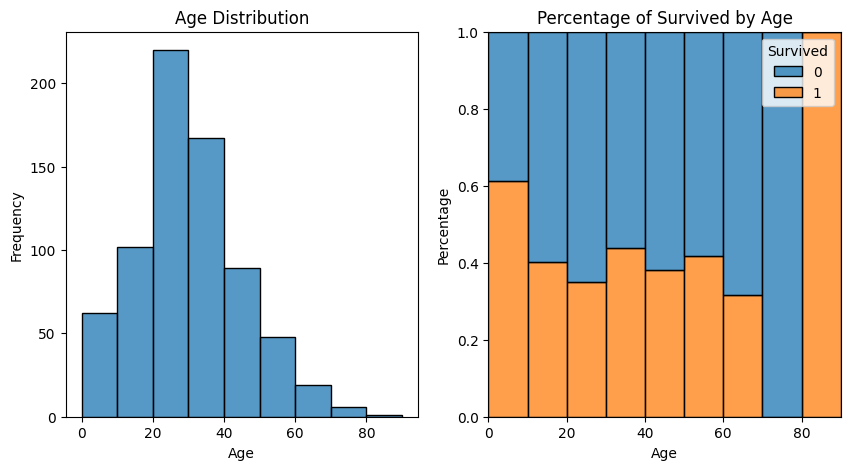

In [3]:
# Plot age distribution by 10 years step on left graph and right graph is the percentage of survived
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Age', bins=np.arange(0, 100, 10))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Age', bins=np.arange(0, 100, 10), hue='Survived', multiple='fill')
plt.title('Percentage of Survived by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()



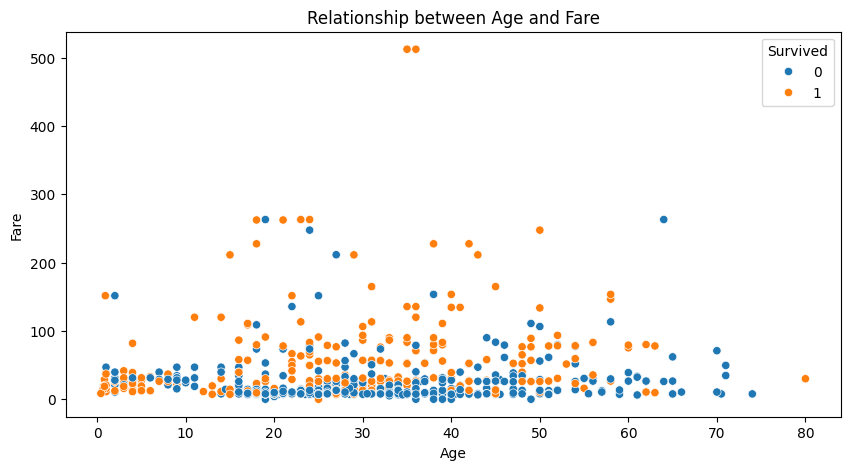

In [4]:
# Plot Взаимосвязь между возрастом и стоимостью билета — scatter plot, визуализирующий связь между возрастом пассажира и стоимостью билета, с цветовой кодировкой по признаку выживания.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


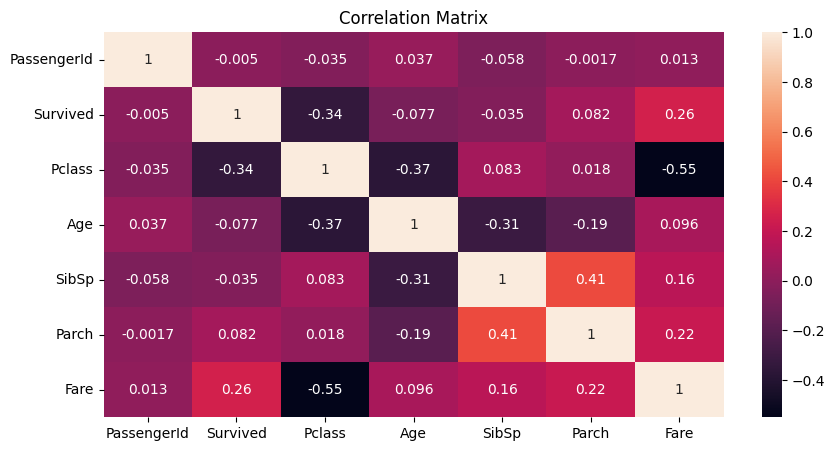

In [5]:
# Корреляционная матрица — тепловая карта, показывающая, насколько числовые признаки коррелируют друг с другом.
plt.figure(figsize=(10, 5))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


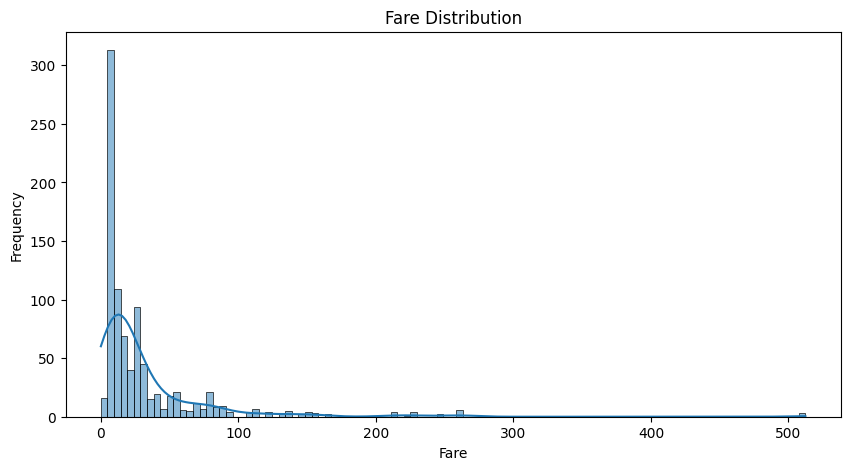

In [6]:
# Распределение стоимости билетов — гистограмма с KDE, показывающая, какова структура цен на билеты.
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Fare', kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Find passengers with familia name Andersson
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Print number field Embarked with not null value use method isnull() summ() and not()
print(data['Age'].isnull().sum())

# Print id of passenger with null value in Embarked field
print(data[data['Age'].isnull()])



177
     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch     

In [8]:
# Make dataset copy
data_copy = data.copy()

# Recovery Age in data_copy by 
print(data_copy['Age'].mode())

0    24.0
Name: Age, dtype: float64


In [9]:
# Set Null Age by Age mode
data_copy['Age'] = data_copy['Age'].fillna(data_copy['Age'].mode()[0])

# Set Null Embarked by 'S'
data_copy['Embarked'] = data_copy['Embarked'].fillna('S')


In [10]:
# Change Pclass by two rows with bulean value using OneHotEncoder drop_first=True
data_copy = pd.get_dummies(data_copy, columns=['Pclass'], drop_first=True)


In [12]:
# Change Embarked by three rows with bulean value using OneHotEncoder drop_first=True
data_copy = pd.get_dummies(data_copy, columns=['Embarked'], drop_first=True)


In [13]:
data_copy.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,True,False,True


In [14]:
# Function for shuffle and split data
def shuffle_and_split_data(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
# Split data on train and test with determinated random
train_set, test_set = shuffle_and_split_data(data_copy, 0.2)
print("Number of rows in training set: ", len(train_set))

Number of rows in training set:  713


In [16]:
# Make X and y for train set
X_train = train_set[["Pclass_2","Pclass_3","SibSp","Age","Embarked_Q","Embarked_S"]].values
y_train = train_set[["Survived"]].values

In [17]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [18]:
X_test = test_set[["Pclass_2","Pclass_3","SibSp","Age","Embarked_Q","Embarked_S"]].values
y_pred = model.predict(X_test)

In [19]:
# Model evaluation
y_test = test_set[["Survived"]].values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7303370786516854
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79       105
           1       0.75      0.52      0.61        73

    accuracy                           0.73       178
   macro avg       0.73      0.70      0.70       178
weighted avg       0.73      0.73      0.72       178



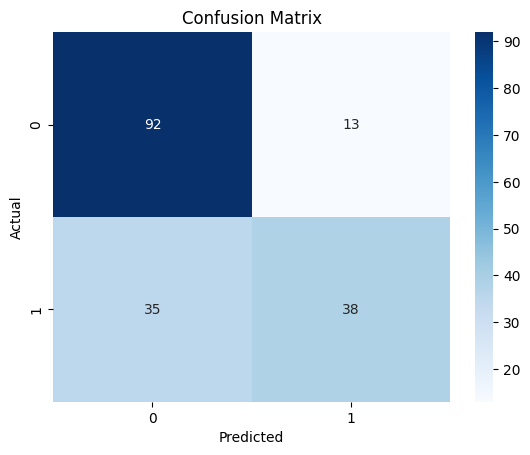

In [20]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7303370786516854
Precision: 0.7450980392156863
Recall: 0.5205479452054794
F1 Score: 0.6129032258064516
ROC AUC: 0.6983692106979777
